In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
df_bank = pd.read_csv('bank-data.csv')

In [6]:
df_bank['region'].tail()

595    INNER_CITY
596    INNER_CITY
597          TOWN
598    INNER_CITY
599          TOWN
Name: region, dtype: object

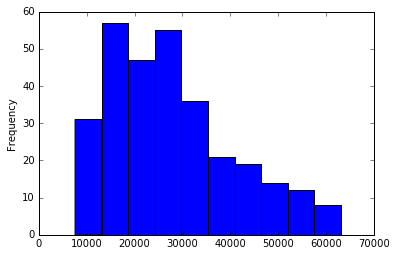

In [9]:
df_bank[df_bank.sex=='FEMALE']['income'].plot.hist()

In [8]:
df_bank[df_bank.sex=='FEMALE']['income']

0      17546.00
2      16575.40
3      20375.40
4      50576.30
5      37869.60
8      25304.30
10     59803.90
11     26658.80
12     15735.80
13     55204.70
15     22342.10
16     17729.80
17     41016.00
18     26909.20
23     15538.80
27     20114.00
28     29359.10
30     22942.90
31     16325.80
33     29921.30
35     19868.00
37     13381.00
38     18504.30
39     25391.50
41     26952.60
43     27571.50
46     13283.90
49     17867.30
55     47835.80
56     24977.50
         ...   
537    57176.40
538    38784.00
540    21821.40
546    15281.80
549    52662.50
550     8020.19
553    39358.30
554    36095.90
555     7723.93
556    18565.80
558    31290.60
559    24858.40
561    23287.90
562    50897.60
563    22446.50
567    17371.10
568    29574.00
570    33665.50
572    27712.90
574    28469.90
576    19160.30
579    25127.70
582    21984.40
583    29093.10
587    31273.80
591    31473.90
594    30971.80
595    47025.00
596     9672.25
597    15976.30
Name: income, dtype: flo

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

## Original Data Source

https://www.irs.gov/uac/soi-tax-stats-individual-income-tax-statistics-zip-code-data-soi

In [10]:
# load the source data
df_ = pd.read_csv("2014_ar_agi_data.csv")

In [11]:
df_.head()

,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,PREP,N2,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
0,5,AR,0,1,512350,296760,82550,123560,281760,837160,...,241620,202335,0,0,0,0,43950,32761,440980,1044313
1,5,AR,0,2,301800,119900,107370,64980,175360,643220,...,247670,597890,0,0,0,0,47070,67366,250050,699551
2,5,AR,0,3,159220,42400,98400,15010,99930,377650,...,153330,803318,0,0,0,0,40910,89951,114670,307518
3,5,AR,0,4,95880,14110,76590,4240,61630,249070,...,95110,813928,0,0,0,0,28080,82869,64690,206582
4,5,AR,0,5,107740,10330,94240,2560,71490,296310,...,107350,1945159,310,66,90,14,43320,247079,59310,244784


In [39]:
# clean our dataframe up a little bit
df = df_[(df_.zipcode>0) & (df_.N1>0)].groupby([df_.zipcode, df_.agi_stub]).sum()
df = df.drop(['STATEFIPS', 'zipcode', 'agi_stub'], axis=1)
df.head()

N1  mars1  MARS2  MARS4  PREP    N2  NUMDEP  TOTAL_VITA  \
zipcode agi_stub                                                              
71601   1         3510   1740    210   1510  1560  6550    3060         120   
        2         1570    560    250    710   700  3360    1550          80   
        3          430    150    140    120   220   890     320           0   
        4          170     40    100     30   100   380     110           0   
        5          150     20    120      0   100   350      80           0   

                  VITA  TCE   ...    N10300  A10300  N85530  A85530  N85300  \
zipcode agi_stub              ...                                             
71601   1          120    0   ...      1490    1270       0       0       0   
        2           80    0   ...      1180    2498       0       0       0   
        3            0    0   ...       410    2126       0       0       0   
        4            0    0   ...       170    1505       0       0       0   
        5            0    0   ...       150    3343       0       0       0   

                  A85300  N11901  A11901  N11902  A11902  
zipcode agi_stub                                          
71601   1              0     170     143    3270   10373  
        2              0     210     253    1350    4132  
        3              0     120     224     300     758  
        4              0      60     148     110     337  
        5              0      70     552      80     294  

[5 rows x 123 columns]

In [72]:
df.loc[71601:71610,][(df['N02650']==df['N1'])][['N1','N02650','A00100','A02650', 'A18300','N19300']]

C:\Python_Anaconda_2_4_1_1_64b\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


N1  N02650  A00100  A02650  A18300  N19300
zipcode agi_stub                                              
71601   1         3510    3510   45496   46101     100      30
        2         1570    1570   54814   55111     723     140
        3          430     430   25510   25632     662     110
        4          170     170   14368   14491     476      50
        5          150     150   21805   22136     931      60
71602   1         2880    2880   37453   38005     194      60
        2         1830    1830   65927   66416     802     190
        3          920     920   55936   56353    1296     200
        4          590     590   51273   51649    1653     220
        5          660     660   87201   87742    4446     410
        6          110     110   33300   33727    2136      80
71603   1         5850    5850   76750   77785     464     120
        2         3650    3650  130464  131372    2003     470
        3         1610    1610   98094   98736    2804     510
        4          850     850   72854   73276    2593     350
        5          980     980  126695  127747    6231     560
        6          190     190   72478   74055    4503     100

In [89]:
df.groupby(level=['zipcode']).sum()['N1'].describe()

count      489.000000
mean      2468.834356
std       4117.168830
min         90.000000
25%        290.000000
50%        740.000000
75%       2310.000000
max      33150.000000
Name: N1, dtype: float64

In [229]:
# sevier county : http://www.geonames.org/postal-codes/US/AR/133/sevier.html
zips_of_sevier = [71823,71841,71842,71846,71832]

zips_of_carroll = [72632,72613,72616,72631,72638,72660]

zips_of_scott = [72841,72926,72944,72950,72958]

zips_of_lincoln = [71643,71644,71667,71678]

zips_of_greene = [72450,72412,72425,72436,72443,72451,72474]

zips_by_county = [('sevier',zips_of_sevier), 
                  ('carroll',zips_of_carroll), 
                  ('scott',zips_of_scott), 
                  ('lincoln',zips_of_lincoln), 
                  ('greene',zips_of_greene)]

In [230]:
df.loc[zips_of_carroll][(df['N02650']==df['N1'])].groupby(level=['agi_stub']).sum()[['N1','N19300']]

C:\Python_Anaconda_2_4_1_1_64b\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,N1,N19300
agi_stub,,
1,5390,140
2,3160,300
3,1350,260
4,680,210
5,660,330
6,120,40


C:\Python_Anaconda_2_4_1_1_64b\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


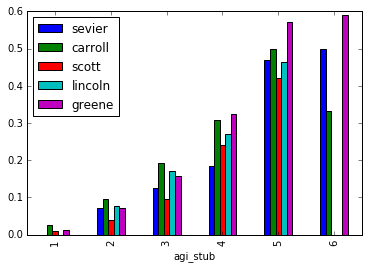

In [233]:
def compute_home_owner_ratio_estimate(county_zips_list):
    return df.loc[county_zips_list][(df['N02650']==df['N1'])]\
        .groupby(level=['agi_stub'])\
        .sum()[['N19300']]['N19300'] \
    / \
    df.loc[county_zips_list][(df['N02650']==df['N1'])]\
        .groupby(level=['agi_stub'])\
        .sum()[['N1']]['N1']

df_hown_ratio = pd.DataFrame()
for county_name, zips_list in zips_by_county:
    df_hown_ratio = pd.concat([df_hown_ratio, \
                               pd.DataFrame(compute_home_owner_ratio_estimate(zips_list), \
                                            columns=[county_name])], \
                              axis=1)
df_hown_ratio.plot.bar()

# Original Data Source

In [236]:
df_bank = pd.read_csv('bank-data.csv')

In [262]:
df_bank

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48,FEMALE,INNER_CITY,17546.00,NO,1,NO,NO,NO,NO,YES
1,ID12102,40,MALE,TOWN,30085.10,YES,3,YES,NO,YES,YES,NO
2,ID12103,51,FEMALE,INNER_CITY,16575.40,YES,0,YES,YES,YES,NO,NO
3,ID12104,23,FEMALE,TOWN,20375.40,YES,3,NO,NO,YES,NO,NO
4,ID12105,57,FEMALE,RURAL,50576.30,YES,0,NO,YES,NO,NO,NO
5,ID12106,57,FEMALE,TOWN,37869.60,YES,2,NO,YES,YES,NO,YES
6,ID12107,22,MALE,RURAL,8877.07,NO,0,NO,NO,YES,NO,YES
7,ID12108,58,MALE,TOWN,24946.60,YES,0,YES,YES,YES,NO,NO
8,ID12109,37,FEMALE,SUBURBAN,25304.30,YES,2,YES,NO,NO,NO,NO
9,ID12110,54,MALE,TOWN,24212.10,YES,2,YES,YES,YES,NO,NO


In [245]:
# naive implementation
f_count, m_count, o_count = 0, 0, 0

for v in df_bank.sex:
    if v == 'FEMALE':
        f_count += 1
    elif v == 'MALE':
        m_count += 1
    else:
        o_count += 1

print f_count, m_count, o_count

300 300 0


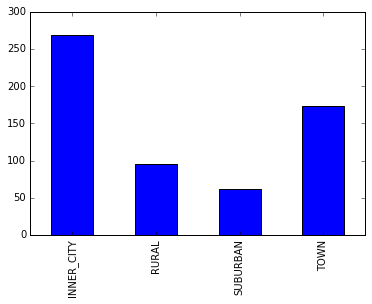

In [261]:
from collections import Counter

# a much better way
pd.Series(Counter(df_bank.region)).plot.bar()

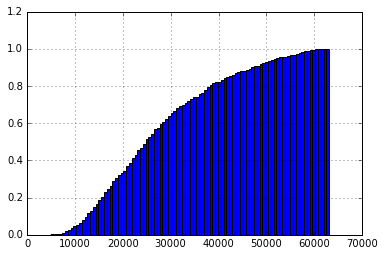

In [278]:
df_bank.income.hist(cumulative=True, normed=1, bins=100)

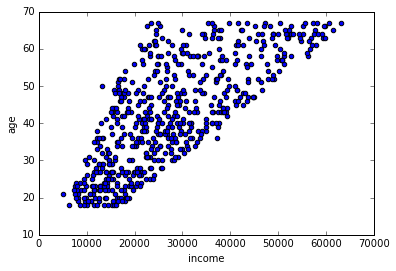

In [269]:
# correlation plot
df_bank.plot.scatter(x='income', y='age')

In [291]:
import matplotlib.pyplot as plt
import scipy.stats as stats

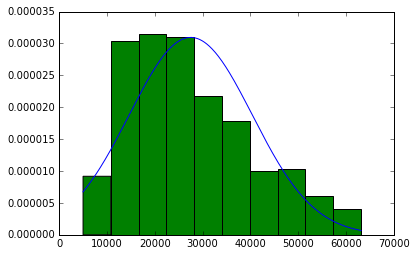

In [295]:
h = df_bank.income.sort_values()
fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #fittingn needed

plt.plot(h, fit)
plt.hist(h, normed=True)     # draw histogram 
plt.show()